# Introduction

here are some notes about the values:

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
# First thing we do is import the dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# loading the dataset
dataset = pd.read_csv("datasets/titanic_datasets/train.csv")
testdataset = pd.read_csv("datasets/titanic_datasets/test.csv")
Testresult = pd.read_csv("datasets/titanic_datasets/gender_submission.csv")

# overview of the data

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# before we move on to the EDA and visualisations we should take a look at
# whether there are any missing values.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# this is an overview of what the uniques data is in each of the columns.
for i in dataset.columns:
    if (i != "PassengerId") and (i != "Name") and (i != "Ticket"):
        print(i)
        print(dataset[f"{i}"].unique())

Survived
[0 1]
Pclass
[3 1 2]
Sex
['male' 'female']
Age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp
[1 0 3 4 2 5 8]
Parch
[0 1 2 5 3 4 6]
Fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.

In [7]:
# we will now handle te missing values for the following columns:
# Age
# Cabin
# Embarked

#we will start with Age first
dataset["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

d:\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


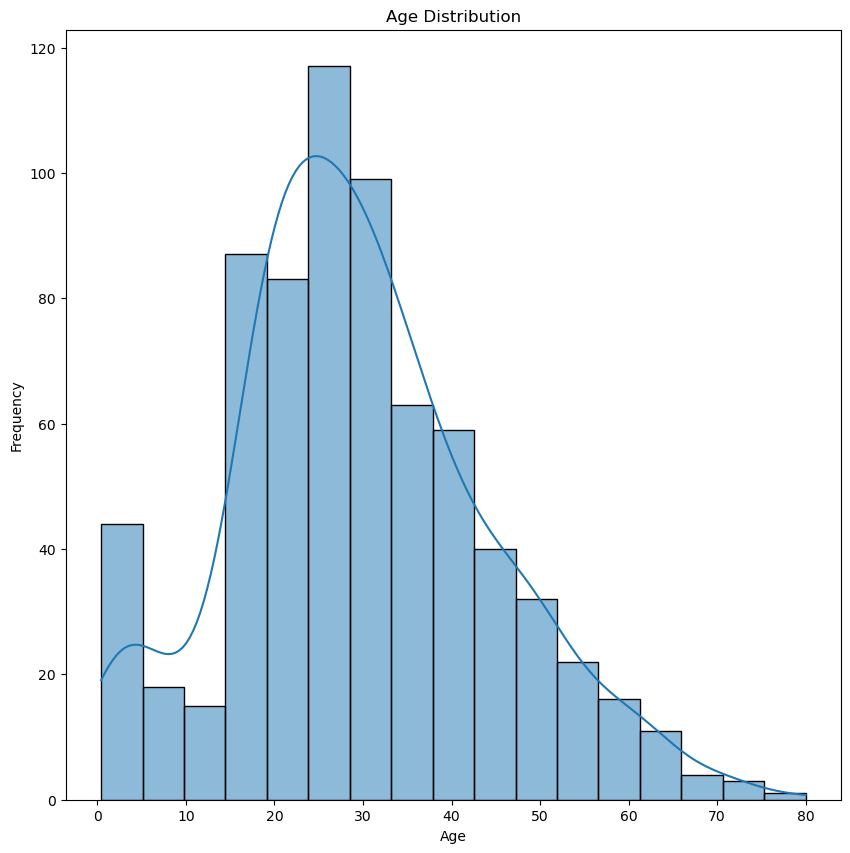

In [8]:
sorted = dataset.sort_values(by="Age")
plt.figure(figsize=(10,10))

sns.histplot(sorted["Age"],bins=17,kde=True)

plt.title('Age Distribution')
plt.ylabel('Frequency')

plt.show()

In [9]:
# one of the best way to handle the Age data is to fill the missing values with
# mean value which is 29.6, which rounds to 30
dataset["Age"].fillna(30, inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# next we will handle the missing values for Cabin, since we are missing around 
# 60% of the values for Cabin, it is better to drop that column completely.
dataset.drop(columns=['Cabin'], inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


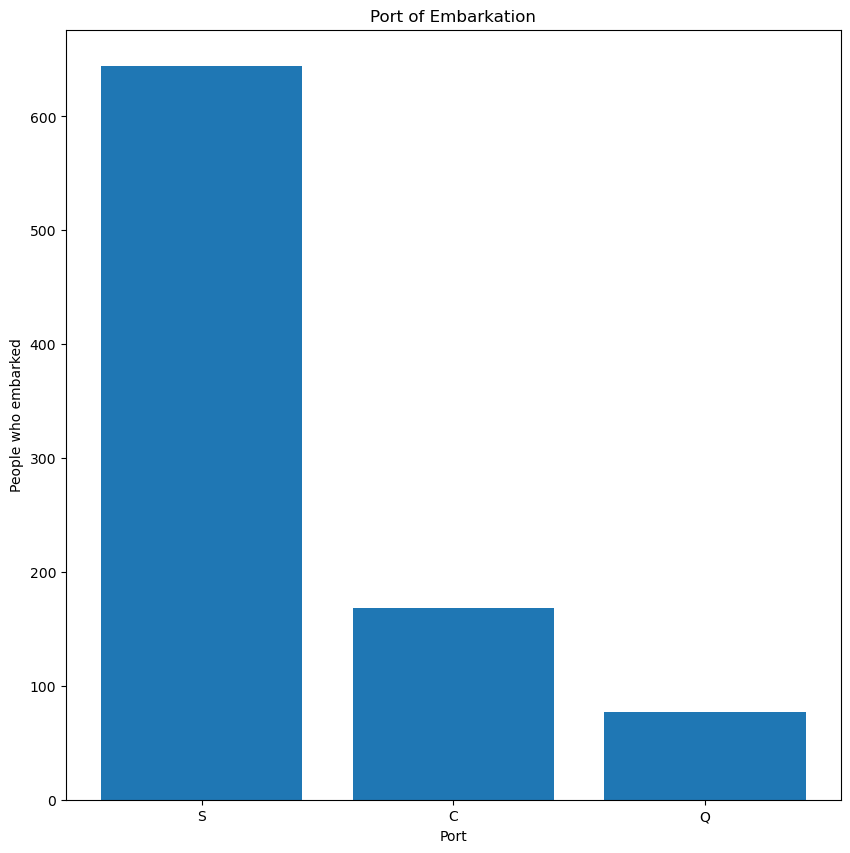

In [12]:
# lastly we can have a look at the Embarked column, its values and what the 
#  missing values is likely to be
plt.figure(figsize=(10,10))

plt.bar(dataset["Embarked"].value_counts().index,
        dataset["Embarked"].value_counts().values)


plt.title('Port of Embarkation')
plt.xlabel('Port')
plt.ylabel('People who embarked')

plt.show()

In [13]:
# there is an overwhelming majority of people who embarked at port S,hence it is reasonable
# to assume that the 2 two missigle values are likely to be "S"
dataset["Embarked"].fillna("S",inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# EDA and Visualisations

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
# before we begin we need to begin with EDA we will first turn 
# some of the string data into numerical values, this will be 
# helpful later on too when doing the model training 

# first we will make it so that if sex is male then the new value for sex is 1
# else it will be 2
dataset["Sex_Num"] = ""

dataset.loc[dataset["Sex"] == "male","Sex_Num"] = 1
dataset.loc[dataset["Sex"] == "female","Sex_Num"] = 2
dataset.drop(columns=["Sex"],inplace=True)
dataset["Sex_Num"] = pd.to_numeric(dataset["Sex_Num"])

#similarly we will also change values such as Embarked
# 1 will be for S, 2 will be C and 3 will be Q.  
dataset["Embarked_Num"] = ""

dataset.loc[dataset["Embarked"] == "S","Embarked_Num"] = 1
dataset.loc[dataset["Embarked"] == "C","Embarked_Num"] = 2
dataset.loc[dataset["Embarked"] == "Q","Embarked_Num"] = 3
dataset.drop(columns=["Embarked"],inplace=True)
dataset["Embarked_Num"] = pd.to_numeric(dataset["Embarked_Num"])
# the last of the columns which are not numerically represented is "Ticket"
# because this contains lots of unique values, it is better to ingore 
'# we can also drop the passengerId which doesn't help us with the visualisations and analysis
# it for the following visualisations:
AllNumbersDataset =  dataset.drop(columns=["Ticket","PassengerId","Name"])




In [16]:
dataset["Sex_Num"].value_counts()

Sex_Num
1    577
2    314
Name: count, dtype: int64

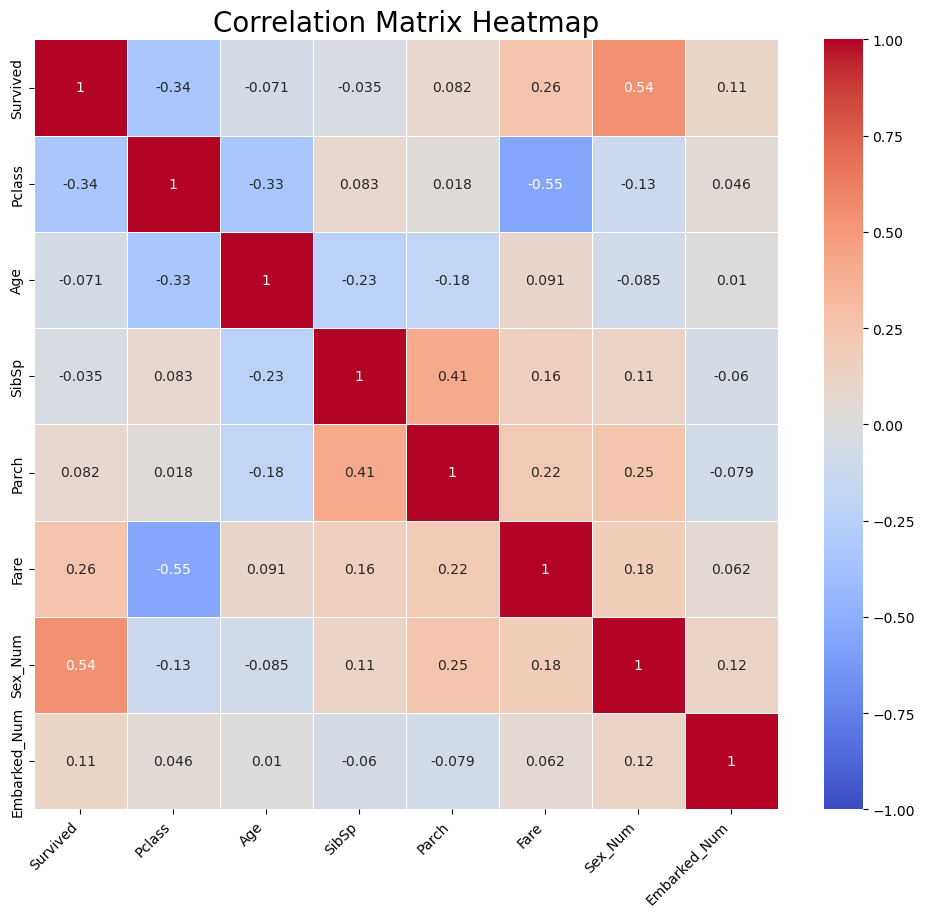

In [17]:
# we will first begin by creating a correlation matrix 
# to understand the connections between the different data
correlation_mtrx = AllNumbersDataset.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_mtrx, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, annot_kws={"size": 10})

plt.title('Correlation Matrix Heatmap', size=20)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

### analysis of Correlation matrix
from the visualisation above what we can assume is that there is a strong evidence of a relationships between the following data columns(I will only select the 3 highest positive and negative correlations):

#### levels of correlations strength

##### Positive
Strong positive:0.7 to 1

moderately positive:0.3 to 0.7

##### Negative
strong negative:-0.7 to -1

moderately negative:-0.3 to -0.7



#### Positive Correlations:

Sex_Num and Survived(0.54 is Moderately positive)

SibSp and ParCh(0.41 is Moderately positive)

lastly Fare and Survived(0.26)

#### Negative Correlations:

Pclass and Fare(-0.55 is moderately negative)

Pclass and Survived(-0.34 is moderately negative)

Pclass and Age(-0.33 is moderately negative) 

none of the above correlation pairs exceed the threshold of 0.8, hence there is no need to remove any of them.

In [26]:
#we will now have a look at which column has a high correlation specifically with our target feature which is 'Survived'
target_corr = AllNumbersDataset.corr()["Survived"].abs().sort_values(ascending=False)
target_corr


Survived        1.000000
Sex_Num         0.543351
Pclass          0.338481
Fare            0.257307
Embarked_Num    0.106811
Parch           0.081629
Age             0.070657
SibSp           0.035322
Name: Survived, dtype: float64

In [35]:
#we will select a threshold of 0.3 for our feature selection process
threshold = 0.3
important_features = target_corr[target_corr>threshold].index.to_list()
#we will need to remove the target feature from this list
important_features.remove('Survived')

In [36]:
important_features

['Sex_Num', 'Pclass']

# model selection and evaluation

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
X = AllNumbersDataset[important_features]
y = AllNumbersDataset["Survived"]

In [53]:
#we will first need to standardise the test dataset same as how we did we did with train dataset 
testdataset["Sex_Num"] = ""

testdataset.loc[testdataset["Sex"] == "male","Sex_Num"] = 1
testdataset.loc[testdataset["Sex"] == "female","Sex_Num"] = 2
testdataset.drop(columns=["Sex"],inplace=True)
testdataset["Sex_Num"] = pd.to_numeric(testdataset["Sex_Num"])

In [55]:
#now we will create the variables for the test datasets
y_test = Testresult["Survived"]
X_test = testdataset[important_features]

In [41]:
#we will now train our different models and evaluate their performance
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X,y)

RandomForestClassifier()

In [57]:
# now we will predict and evaluate
y_predict = randomforestmodel.predict(X_test)

In [59]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy: 0.8277511961722488
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       266
           1       1.00      0.53      0.69       152

    accuracy                           0.83       418
   macro avg       0.89      0.76      0.79       418
weighted avg       0.86      0.83      0.81       418



In [62]:
model = LogisticRegression()
model.fit(X,y)
y_predict = model.predict(X_test)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

